In [1]:
"""Analysis of the greedy results"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "optimal_greedy_test_basic_j12_s2_0",
  # "optimal_greedy_test_basic_j15_s2_0",
    "optimal_greedy_test_basic_j15_s3_0",
    "optimal_greedy_test_basic_j25_s5_0",
    "optimal_greedy_test_basic_j50_s5_0"
]

big_small = [
    "optimal_greedy_test_big_small_j12_s2_0",
  # "optimal_greedy_test_big_small_j15_s2_0",
    "optimal_greedy_test_big_small_j15_s3_0",
    "optimal_greedy_test_big_small_j25_s5_0",
    "optimal_greedy_test_big_small_j50_s7_0",
    "optimal_greedy_test_big_small_j75_s8_0",
    "optimal_greedy_test_big_small_j100_s10_0"
]
all_policies = [
    '../all_greedy_test_Fog_j12_s3_0'
]
paper = [
  # "flexible_greedy_fog_j15_s3_0",
  # "flexible_greedy_fog_j20_s4_0",
  # "flexible_greedy_fog_j30_s5_0",
    
  # "flexible_greedy_fog_j12_s4_0",
  # "flexible_greedy_fog_j16_s5_0",
  # "flexible_greedy_fog_j20_s6_0",
  # "flexible_greedy_fog_j32_s8_0",
  # "flexible_greedy_fog_j40_s10_0"
    
    "paper_fog_v2_j4_s1_0",
    "paper_fog_v2_j8_s2_1",
    "paper_fog_v2_j12_s3_0",
    "paper_fog_v2_j12_s3_1",
    "paper_fog_v2_j4_s1_1",
    "paper_fog_v2_j8_s2_2",
    "paper_fog_v2_j12_s3_2",
    "paper_fog_v2_j16_s4_0",
    "greedy_fog_v2_j4_s1_0",
    "greedy_fog_v2_j8_s2_0",
    "greedy_fog_v2_j12_s3_0"
]

In [5]:
encoded_filenames = paper
folder = "paper"
x_axis = 'Social Welfare'
title = "{} of {} model".format("Social Welfare", 'Basic')

In [8]:
data = []
model_names: List[str] = []
test_name: str = ''

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        json_data = json.load(file)
        
        for pos, results in enumerate(json_data):
            # Find the best results of sum value or percentage jobs from all of the algorithms
            best_sum_value = results['optimal']['sum value'] if 'optimal' in results else max(r['sum value'] for r in results.values())
            best_percentage_jobs = results['optimal']['percentage jobs'] if 'optimal' in results else max(r['percentage jobs'] for r in results.values())
            if best_percentage_jobs == 0:
                continue
                
            for algo_name, algo_results in results.items():
                if type(algo_results) is dict:  # Otherwise optimal or relaxed == 'failure'
                    data.append((pos, model_name, algo_name, algo_results['sum value'],
                                 algo_results['percentage jobs'], algo_results['solve_time'],
                                 algo_results['sum value'] / best_sum_value,
                                 algo_results['percentage jobs'] / best_percentage_jobs))
                    

df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Social Welfare', 'Percentage Jobs',
                                 'Solve Time', 'Optimal Social Welfare', 'Best Percentage Jobs'])

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


IndexError: index 4 is out of bounds for axis 1 with size 4

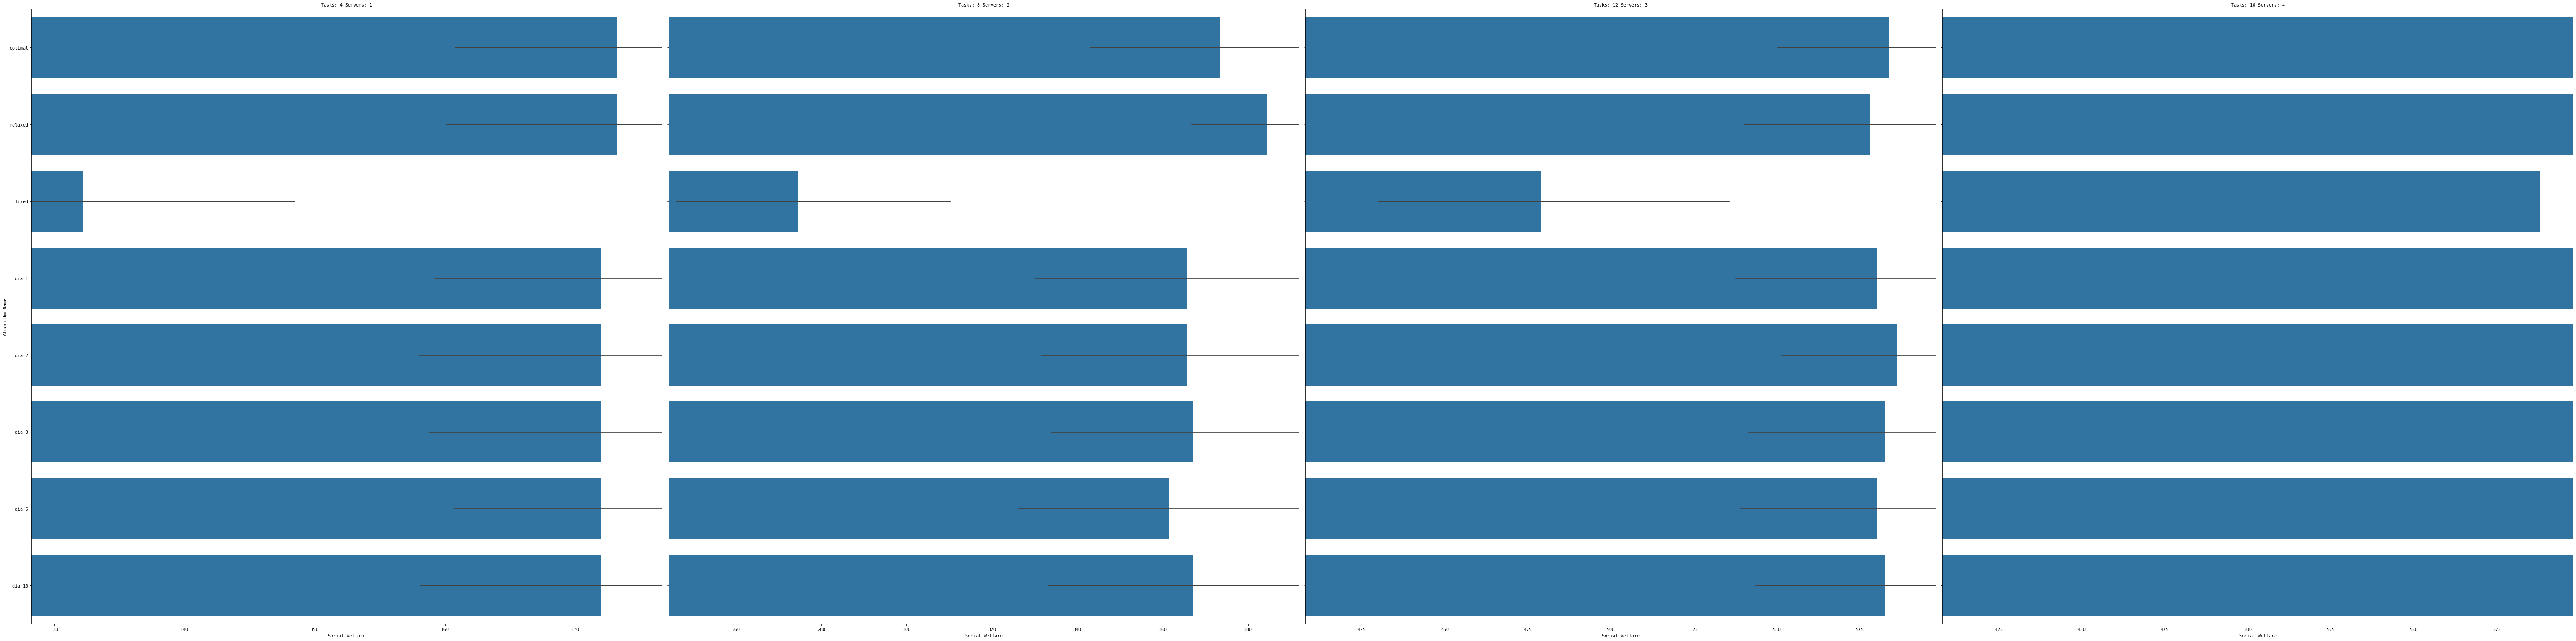

In [9]:
g = sns.FacetGrid(df, col='Model Name', sharex=False, height=20)
g = g.map(sns.barplot, x_axis, 'Algorithm Name').set_titles("{col_name}")

for pos, model in enumerate(model_names):
    values = [np.mean(df[(df['Model Name'] == model) & (df['Algorithm Name'] == algo)][x_axis])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.97, max(values) * 1.02)

g.fig.subplots_adjust(top=0.88)
g.fig.suptitle(title)

g    

In [10]:
df['Algorithm Name'].unique()

array(['optimal', 'relaxed', 'fixed', 'dia 1', 'dia 2', 'dia 3', 'dia 5',
       'dia 10', 'Greedy Utility / Sum, minimise Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Uti

In [16]:
short_df = df[(df['Algorithm Name'] == 'optimal') | 
              (df['Algorithm Name'] == 'fixed') |
              (df['Algorithm Name'] == 'Greedy Utility * deadline / Sum, minimise Sum, Percentage Sum')]
short_df = short_df[~(short_df['Model Name'] == 'Tasks: 16 Servers: 4')]
short_df = short_df.replace('optimal', 'Optimal').replace('relaxed', 'Relaxed').replace('fixed', 'Fixed').replace('Greedy Value, maximise Sum, Percentage Sum', 'Greedy Value').replace('Greedy Utility * deadline / Sum, minimise Sum, Percentage Sum', 'Greedy Mechanism')

short_df

,Pos,Model Name,Algorithm Name,Social Welfare,Percentage Jobs,Solve Time,Optimal Social Welfare,Best Percentage Jobs
0,0,Tasks: 4 Servers: 1,Optimal,268,0.750,0.154,1.000000,1.000000
2,0,Tasks: 4 Servers: 1,Fixed,268,0.750,0.000,1.000000,1.000000
8,1,Tasks: 4 Servers: 1,Optimal,200,0.750,0.251,1.000000,1.000000
10,1,Tasks: 4 Servers: 1,Fixed,78,0.250,0.000,0.390000,0.333333
16,2,Tasks: 4 Servers: 1,Optimal,134,0.750,0.096,1.000000,1.000000
...,...,...,...,...,...,...,...,...
5040,9,Tasks: 12 Servers: 3,Greedy Mechanism,534,0.833,0.496,0.965642,1.000000
5088,10,Tasks: 12 Servers: 3,Greedy Mechanism,534,0.750,0.451,0.990724,0.900360
5136,11,Tasks: 12 Servers: 3,Greedy Mechanism,557,0.833,0.489,0.948893,0.908397
5184,12,Tasks: 12 Servers: 3,Greedy Mechanism,583,0.833,0.471,0.966833,1.000000


Save file location: ../figures/greedy/png/all_shortened.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/greedy/eps/all_shortened.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


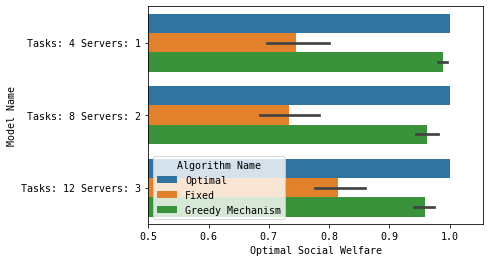

In [17]:
g = sns.barplot(y='Model Name', x='Optimal Social Welfare', hue='Algorithm Name', data=short_df)
g.set_xlim(0.5, 1.055)
save_plot(analysis_filename('all', 'shortened'), "greedy", image_formats=[ImageFormat.PNG, ImageFormat.EPS])
